In [13]:
%load_ext autoreload

%autoreload 2

import numpy as np
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
import torch.nn.functional as F
from copy import deepcopy

import matplotlib.pyplot as plt
import imageio
from PIL import Image
from datetime import datetime
from tqdm import tqdm

from IPython.display import display, clear_output
import time

from cppn_protyper import CPPN, Sampler

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [149]:
# net_size = [1024, 32, 256, 16, 128, 6]
# net_size = [512, 32, 256, 16, 128, 6, 6, 6, 6, 6, 6]
# net_size = [128, 128, 64, 64, 32, 32, 16, 8]
# net_size = np.tile([256, 16, 8], 2)
# net_size = [32, 64, 128, 512, 256, 128, 64, 32]
# net_size = [512, 64, 32, 16, 8]
# net_size = [512, 32, 32, 16] ## pretty
# net_size = [512, 32, 32, 3] 
# net_size = [512, 16, 512, 32, 16, 3]  ## also pretty
net_size = [512, 16, 512, 32, 8, 3]  ## also pretty
# net_size = [512, 64, 64, 3]  # also pretty
# net_size = [512, 64, 64, 6, 6, 6, 6, 6]
# net_size = [256, 128, 128, 6, 6, 6, 6]
# net_size = [256,256, 16, 16, 3]
# net_size = [128, 160, 200, 4]
# net_size = [128, 64, 32, 16, 16, 2]  ## also pretty
# net_size = [32, 32, 32]
# net_size = [128, 128, 128, 128, 128]
dim_z = 16
dim_c = 3
projection_config = (int(100), 1.)
print(net_size)

cppn = CPPN(net_size, dim_z, dim_c, projection_config=projection_config).cuda()
sampler = Sampler(cppn)

[512, 16, 512, 32, 8, 3]


# Generate Image

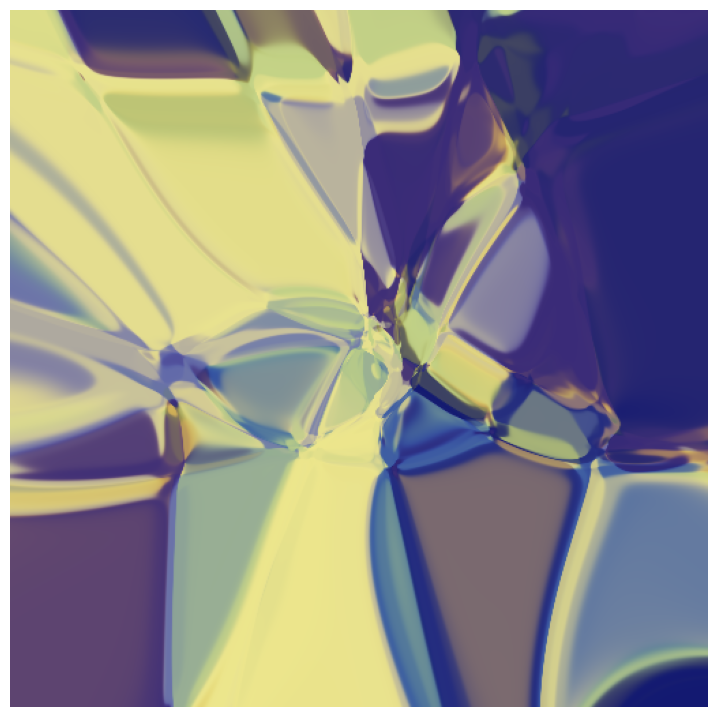

In [175]:
projection_config = (int(100), .05)
projection_config = None
cppn = CPPN(net_size, dim_z, dim_c, projection_config=projection_config).cuda()
sampler = Sampler(cppn)
# cppn.reinit(empty_cache=True)

gscale = 1
scale = 1
xres = 512
yres = int(512*1 )
zscale = .1
nscale = 0

z =  torch.randn(1, dim_z).cuda()
delta_v = torch.randn(1, dim_z).cuda() 
# delta_v = delta_v / torch.norm(delta_v)
z2 = z + 0.02*delta_v
coords = cppn._coordinates(scale*gscale,
                           xres, yres, z*zscale*gscale)

# coords[2] = coords[2] * 0.


cppn.eval()
x = sampler.generate_img(cppn, z*zscale, scale, xres, yres, coords=coords)
sampler.imshow(x[:, :, 0:3])

In [143]:
torch.randn(10, 5).shape

torch.Size([10, 5])

In [ ]:
plt.imshow(cppn.forward(coords, xres, yres).reshape(xres, yres).detach().cpu().numpy())

In [ ]:
cppn.forward(coords, xres, yres).shape